In [ ]:
# Predicting Stock Price with Machine Learning Algorithm
> Making use of Linear regression, Decision Tree, Ridge & Support Vector Macchine to predict Google stock price
- toc: true
- badges: true
- comments: true
- categories: [Time-Serie,Linear-regression,SVR,RIDGE,Random-Forest, GOOGL, scikit-learn]
- image: images/Goog.jpg

In [ ]:
# Importing librairies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import datetime
%matplotlib inline 

In [ ]:
#hide_input
#Loading the google csv file
from google.colab import files
files.upload()

Saving GOOGL.csv to GOOGL.csv


{'GOOGL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700\n2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700\n2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500\n2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200\n2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100\n2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100\n2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900\n2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500\n2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900\n2009-06-05,222.757751,223.893890,219.949951,222.382385,222.382385,7354200\n2009-06-08,219.969971,220.680679,217.277283,219.604599,219.604599,6191200\n2009-06-09,219.509506,220.470474,216.096100,218.028030,218.028030,6503200\n2009-06-10,218.333328,219.164169,213.5485

In [ ]:
train_data = pd.read_csv("GOOGL.csv")
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   object 
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


We're going to use the Adj.Close to predict the stock prices at the end of the day.

In [ ]:
#Working with date 
#From the train_data.info(), we can see that the train_data.Date has an object data type, so we need to convert it into a datetime object
train_data["Date"]= pd.to_datetime(train_data["Date"])
train_data.set_index("Date", inplace=True )
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [ ]:
#Adding a few more column to the train data dataset 
train_data["Year"]= train_data.index.year
train_data["Month"]= train_data.index.month
train_data["Weekday name"]= train_data.index.day_name()

In [ ]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday name
Date,,,,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700,2009,5,Friday
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700,2009,5,Tuesday
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500,2009,5,Wednesday
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200,2009,5,Thursday
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100,2009,5,Friday


# Exploratory Data Analysis

Text(0.5, 1.0, 'Close Price History')

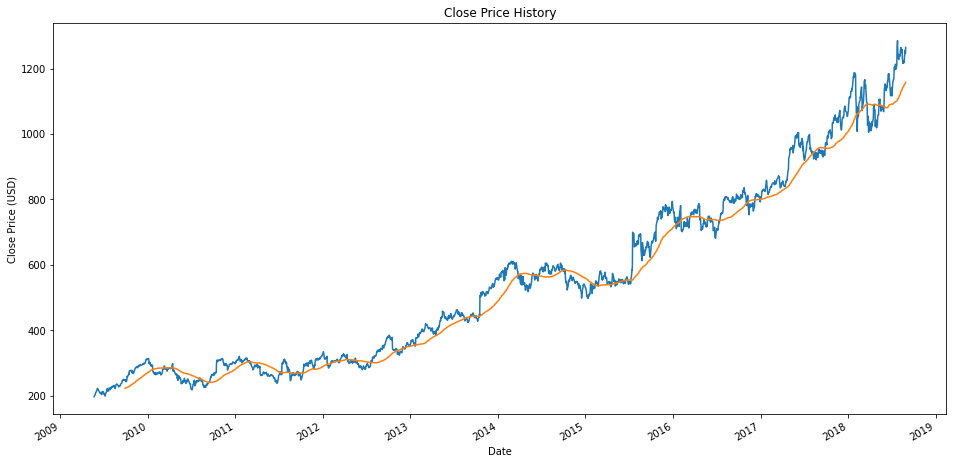

In [ ]:
#Visualizing the Adj.Close 
plt.figure(figsize=(16,8))
train_data["Adj Close"].plot()
train_data["Adj Close"].rolling(window=90).mean().plot()
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Close Price History")

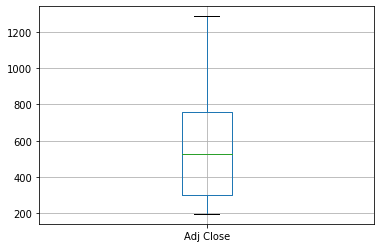

In [ ]:
#Visualizing the Highest and Lowest value 
train_data.boxplot(column= ["Adj Close"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cbcada780>,
      dtype=object)

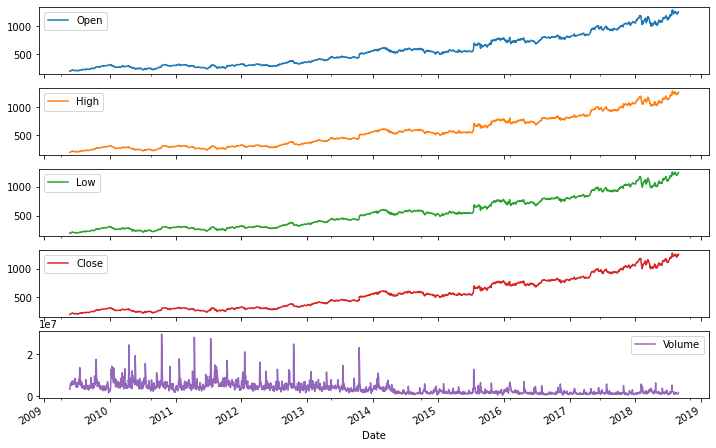

In [ ]:
#Visualizing other column in the dataset 
train_data[["Open","High","Low","Close","Volume"]].plot(figsize=(12,8),subplots=True)

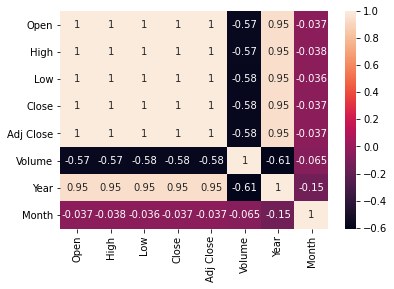

In [ ]:
#Visualizing the correlation between these features of the dataset 
corr=train_data.corr()
sns.heatmap(corr, annot= True)

- it shows that Adj. Close, Open, High, Close and Low have a very high correlation. So we have to drop these values.

# PREPROCESSING 
# ADDING NEW FEATURES TO THE DATASET
- Due to the high correlation, it is more convinient to add some features to the dataset.
- HL_PCT calculates for the high-low percentage for each day and the PCT_change calculatesfor the open-close percentage for each day.

In [ ]:
train_data["HL_PCT"]= (train_data["High"] - train_data["Low"])/ train_data["Low"]*100 #High Low percentage 
train_data["PCT_change"]= (train_data["Close"]- train_data["Open"])/train_data["Open"]*100 #Open Close percentage

In [ ]:
#CHECKING FOR NULL VALUES IN THE DATASET
train_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Year            0
Month           0
Weekday name    0
HL_PCT          0
PCT_change      0
dtype: int64

In [ ]:
#PICKING THE FEATURES WE WILL WORK WITH 
df = train_data[["Adj Close", "HL_PCT", "PCT_change", "Volume"]]

In [ ]:
#Making a Forecast feature for predicting the stock prices
forecast_out = int(math.ceil(len(df)*0.05)) #forcasting out 5% of the entire dataset 
print(forecast_out)

117


In [ ]:
df["Prediction"]= df["Adj Close"].shift(-forecast_out)
df["Prediction"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date
2009-05-22    275.825836
2009-05-26    281.536530
2009-05-27    283.663666
2009-05-28    285.565552
2009-05-29    284.209198
                 ...    
2018-08-23           NaN
2018-08-24           NaN
2018-08-27           NaN
2018-08-28           NaN
2018-08-29           NaN
Name: Prediction, Length: 2335, dtype: float64

# MODEL BULDING 

In [ ]:
#Importing Librairies 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [ ]:
#SCALING THE DATA
#Now we scale the data between -1 and 1 in order to pu all the column in the same range.
#We will be using the StandardSacler fuction from the preprocessing module of sklearn librairy
scaler = StandardScaler()

In [ ]:
X = np.array(df.drop(["Prediction"],1))
scaler.fit(X)
X = scaler.transform(X)

# PICKING THE DATA TO BE PREDICTED
- We have succesfully scaled the data.
- Previously we've included a new column called "Prediction" to our dataset wich contains forcasted out values.
-Also, we've made a room for 117 new predictions.
-So we are going to pick all rows in the dataset excluding the remaining 117 rows as our training data, and use the remaining 117 rows as the data to be predicted.

In [ ]:
X_Predictions = X[-forecast_out:]#data to be predicted
X = X[:-forecast_out]#data to be trained 

In [ ]:
X.shape

(2218, 4)

In [ ]:
#GETTING THE TARGET VALUE 
df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y = np.array(df["Prediction"])
y.shape

(2218,)

In [ ]:
#Training the data with 80% of X
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# TRAINING MODELS 
- Applying different linear regression models and see which gives the best accuracy.

# LINEAR REGRESSION

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_confidence = lr.score(X_test, y_test)
lr_confidence

0.9558130106873121

# RANDOM FOREST

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_confidence = rf.score(X_test, y_test)
rf_confidence

0.9736339536229068

# RIDGE

In [ ]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rg_confidence = rg.score(X_test, y_test)
rg_confidence

0.9558232815861608

# SUPPORT VECTOR REGRESSOR (SVR)

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_confidence = svr.score(X_test, y_test)
svr_confidence

0.6725552349692899

In [ ]:
#Visualizing wich model have the best accuracy
names =["Linear Regression", "Random Forest", "Ridge", "SVR"]
columns = ["models", "accuracy"]
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x,y] for x,y in zip(names,scores)], columns= columns)
alg_vs_score

,models,accuracy
0,Linear Regression,0.955813
1,Random Forest,0.973634
2,Ridge,0.955823
3,SVR,0.672555


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

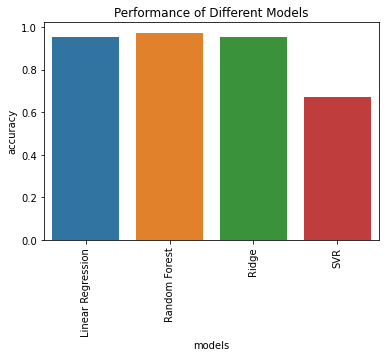

In [ ]:
sns.barplot(data = alg_vs_score, x= "models", y="accuracy")
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')

In [ ]:
#ADDING THE PREDICTED DATA TO THE DATASET 
last_date = df.index[-1]
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [ ]:
forecast_set = rf.predict(X_Predictions)
df["Forecast"] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += 86400
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


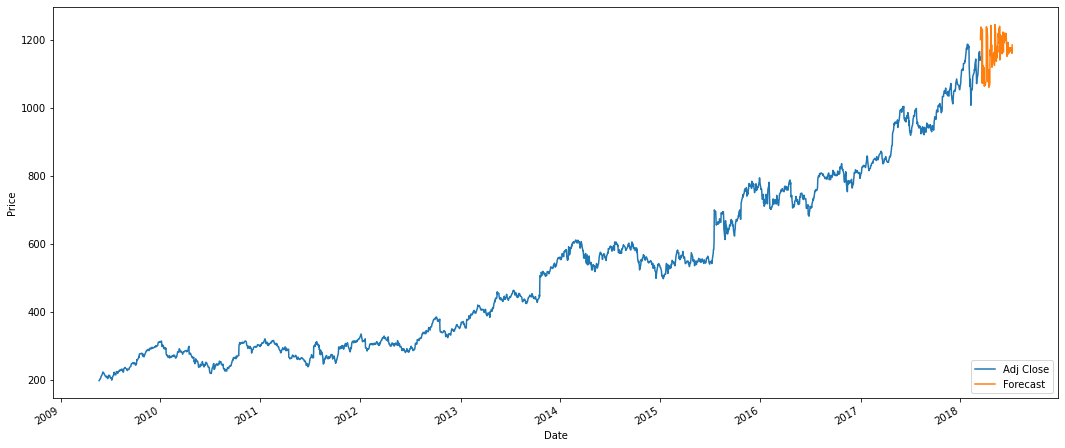

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

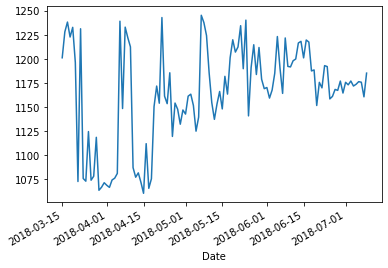

In [ ]:
df['Forecast'].plot()